# Randomness

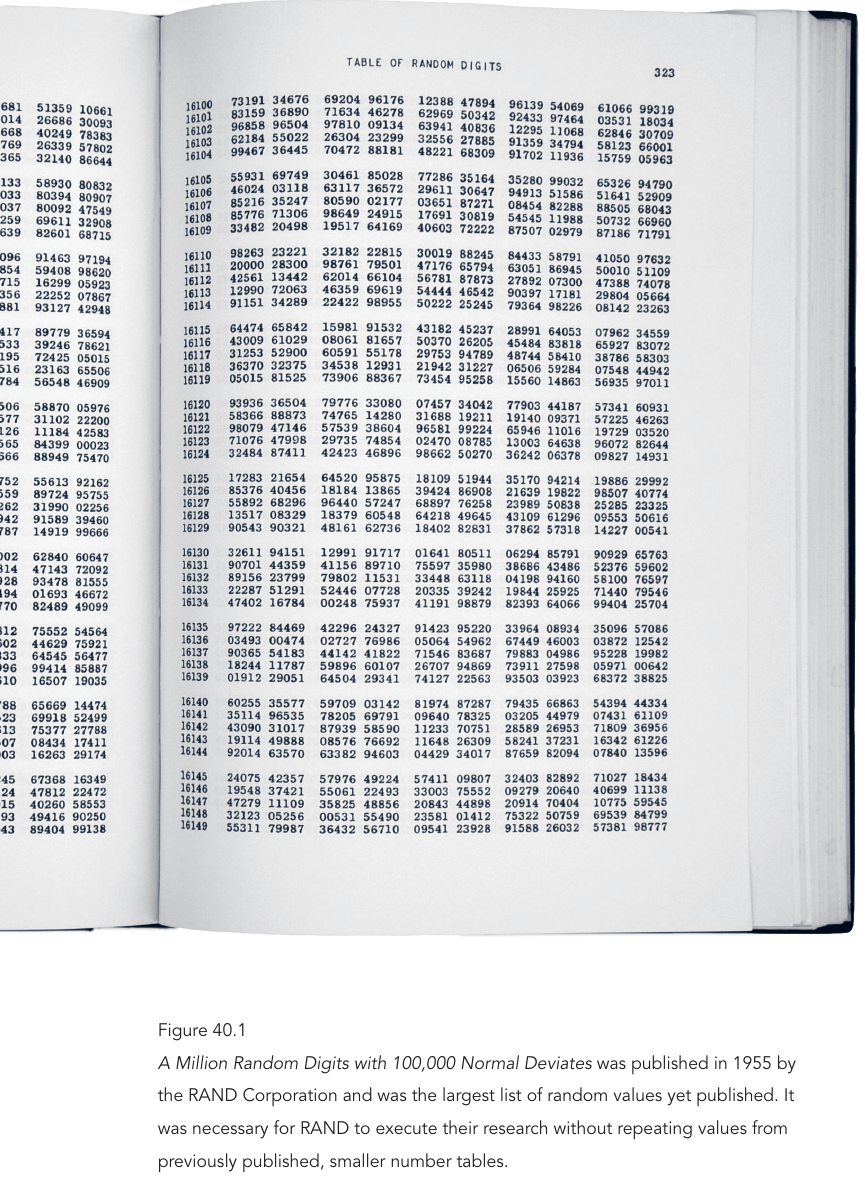  

Above picture is taken from Nick Montford's excellent book on a popular one-liner  
`10 PRINT CHR$(205.5+RND(1)); : GOTO 10`  
that produced intriguing random imagery in the 1980's home computer era. 
It has a good chapter on randomness covering following sections:  
Games of Chance  
Randomness Before Computing  
Randomness Comes to Computing  
Computational Randomness in the Arts  
The Commodore 64 RND Function

### Pseudo random examples

In [ ]:
import random

print("Random float: ", random.random())

In [ ]:
print("Random integer: ", random.randint(0, 9))

In [ ]:
random_list = ['Tree', 'Keys', 'Washing Machine', 'Tomato', 'Money']

print("Random element from list:", random.choice(random_list))

random_list generated with: https://www.randomlists.com/things

In [ ]:
random.shuffle(random_list)
print ("Printing shuffled list ", random_list)

All the examples above are **pseudo** random as they can be replicated with a fixed seed:

In [ ]:
random.seed(6)
print(random.randint(0, 9999))

### True random

#### Lavarand

The company Cloudfare uses a wall of lava lamps to generate cryptographic entropy in generating random numbers. The company videotapes the lamps and turns the footage into a stream of “random, unpredictable bytes” to generate secure encryption keys.

source: https://laughingsquid.com/cloudflare-wall-of-lava-lamps/

The original Lavarand was a hardware random number generator designed by Silicon Graphics that worked by taking pictures of the patterns made by the floating material in lava lamps, extracting random data from the pictures, and using the result to seed a pseudorandom number generator.

source: https://en.wikipedia.org/wiki/Lavarand

In [ ]:
from IPython.display import Image
Image(url='https://blog.cloudflare.com/content/images/2017/11/lava-lamps.jpg')

#### System random

- /dev/random (typically blocks if there is less entropy available than requested)
- /dev/urandom (typically never blocks, even if the pseudorandom number generator seed was not fully initialized)

Common sources include:
- environmental noise collected from device drivers
- hardware interrupt (timing assumed) 

In [ ]:
number = random.SystemRandom().random()
print(number)

#### random.org

In [ ]:
import requests

x = requests.get('https://www.random.org/integers/?num=1&min=1&max=9999&col=1&base=10&format=plain&rnd=new')

print(x.text)

In [ ]:
random.seed(x.text)

print(random.randint(1, 9999))

### Generating random data with numpy

In [ ]:
!pip install numpy matplotlib

#### Generate a random RGB color

In [ ]:
import numpy as np

color = np.random.randint(256, size=3)

print(color)

Plot using matplotlib

In [ ]:
import matplotlib.pyplot as plt

img = color * np.ones([1, 1, 3], dtype=np.uint8)

plot = plt.imshow(img)
plt.show()

#### Generate a grid of random colors

In [ ]:
width, height = 3, 3

random_colors = [np.random.randint(256, size=3) for x in range(width*height)]

# print(random_colors)

In [ ]:
random_color_arr = np.array(random_colors)

grid = np.reshape(np.arange(width*height, dtype=np.uint8), (width, height))

plt.imshow(random_color_arr[grid])

plt.show()

#### Random color noise

In [ ]:
# create a random number generator
rng = np.random.default_rng()

img = (rng.standard_normal([32, 32, 3]) * 255).astype(np.uint8) # Draw samples from a standard Normal distribution (mean=0, stdev=1).

plt.imshow(img)

plt.show()

In [ ]:
data = rng.random([8, 8]) # Return random floats between 0.0 and 1.0).

plt.imshow(data, cmap='Greys', interpolation='none')

plt.show()

In [ ]:
data = rng.random([16, 16])

fig = plt.figure(figsize=(24, 6))

interpolations = ['None', 'bilinear', 'gaussian', 'bicubic']

for idx, i in enumerate(interpolations):
    
    fig.add_subplot(1, len(interpolations), idx + 1).title.set_text(i)
    plt.imshow(data, cmap='magma', interpolation=i)

plt.show()

#### GAN's: From noise to image:

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('imbsfD_HB1I')

#### Scattering points in a coordinate system

In [ ]:
data = rng.random([16, 16])

n = 50 

x = rng.random(size=n)
y = rng.random(size=n)
colors = rng.random(size=n)

area = (30 * rng.random(size=n))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

#### Brownian motion simulation

In [ ]:
n = 500
x = np.cumsum(rng.standard_normal(n)) # cumsum returns the cumulative sum of the elements along a given axis.
y = np.cumsum(rng.standard_normal(n))

# add 10 intermediary points between two successive points
k = 10
# interpolate x and y
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)

color = range(n * k)

plt.scatter(x2, y2, c=color)
plt.colorbar()
plt.show()

#### Plot a random graph

In [ ]:
ys = rng.random(size=64)
print(ys)
x = [x for x in range(len(ys))]
print(x)

plt.plot(x, ys)
plt.fill_between(x, ys, facecolor='g', alpha=0.6)

plt.show()

Specify the lower and upper bounds of the random distribution:

In [ ]:
ys = rng.uniform(1, 2, size=64)
x = [x for x in range(len(ys))]

plt.plot(x, ys)
plt.fill_between(x, ys, facecolor='g', alpha=0.6)

plt.show()

Plotting the histogram to visualize the random distribution:

In [ ]:
plt.hist(ys)

plt.show()

#### Plot a graph using a normal (Gaussian) distribution:

In [ ]:
ys = rng.standard_normal(size=128)

x = [x for x in range(len(ys))]

plt.plot(x, ys)

plt.show()

Notice ho the histogram changes:

In [ ]:
plt.hist(ys)

plt.show()